In [14]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter, WeibullAFTFitter
import matplotlib.pyplot as plt
import numpy as np

### 1. Coleta e Preparação de Dados

In [15]:
url = "cancer.csv"
data = pd.read_csv(url)

print("Primeiras linhas do dataset:")
data.head()

# Verificando valores nulos
print("\nValores nulos por coluna:")
print(data.isnull().sum())

# Removendo valores nulos
data = data.dropna()

# Mapeando valores categóricos
data['sex'] = data['sex'].map({1: 'Male', 2: 'Female'})
data['status'] = data['status'].map({1: 'Censored', 2: 'Dead'})

print("\nValores nulos após limpeza:")
print(data.isnull().sum())

print("\nPrimeiras linhas do dataset após limpeza:")
data.head()

Primeiras linhas do dataset:

Valores nulos por coluna:
inst          1
time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

Valores nulos após limpeza:
inst         0
time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64

Primeiras linhas do dataset após limpeza:


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,Dead,68,Male,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,Dead,57,Male,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,Censored,74,Male,1.0,50.0,80.0,513.0,0.0
6,7.0,310,Dead,68,Female,2.0,70.0,60.0,384.0,10.0
7,11.0,361,Dead,71,Female,2.0,60.0,80.0,538.0,1.0


### 2. Análise de Kaplan-Meier

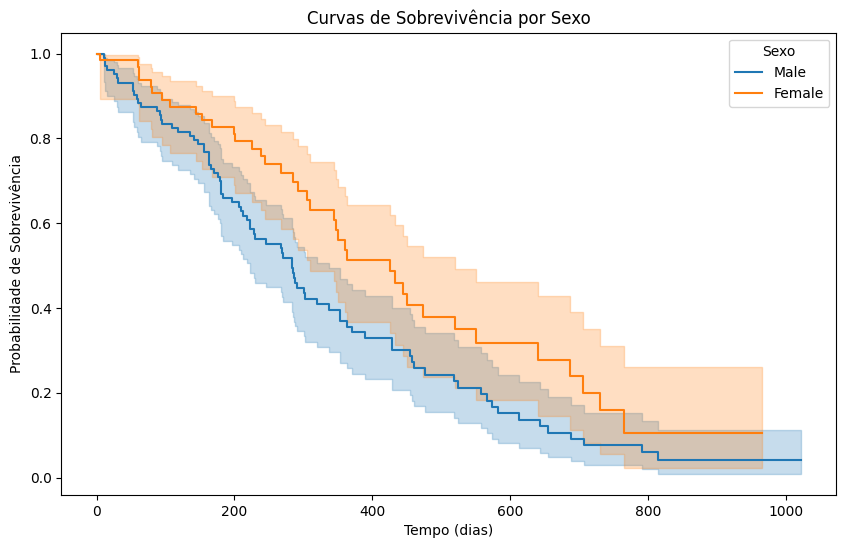

In [16]:
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

for sex in data['sex'].unique():
    mask = data['sex'] == sex
    kmf.fit(durations=data[mask]['time'], event_observed=data[mask]['status'] == 'Dead', label=sex)
    kmf.plot_survival_function()

plt.title('Curvas de Sobrevivência por Sexo')
plt.xlabel('Tempo (dias)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.legend(title='Sexo')
plt.show()

### 3. Análise de Modelos de Sobrevivência

C:\Users\Laura\AppData\Local\Temp\ipykernel_18152\180896799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['status'] = model_data['status'].map({'Censored': 0, 'Dead': 1})
C:\Users\Laura\AppData\Local\Temp\ipykernel_18152\180896799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['sex'] = model_data['sex'].map({'Male': 0, 'Female': 1})



Resumo do Modelo de Cox:
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age        0.010803   1.010862  0.011600       -0.011932        0.033539   
sex       -0.553612   0.574870  0.201585       -0.948712       -0.158512   
ph.ecog    0.739530   2.094952  0.224987        0.298564        1.180496   
ph.karno   0.022438   1.022691  0.011232        0.000424        0.044452   
pat.karno -0.012074   0.987999  0.008116       -0.027981        0.003834   
meal.cal   0.000028   1.000028  0.000259       -0.000480        0.000537   
wt.loss   -0.014200   0.985900  0.007766       -0.029422        0.001022   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
age                   0.988139             1.034107     0.0  0.931329   
sex                   0.387239             0.853413     0.0 -2.746291 

<Figure size 1000x600 with 0 Axes>

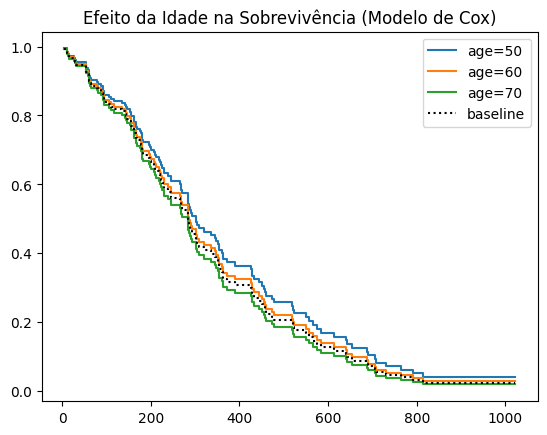

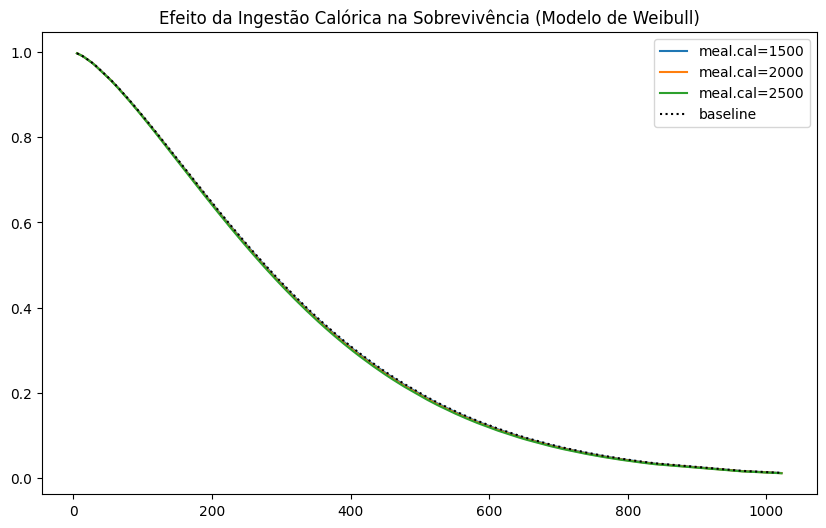

In [17]:
# Preparando o dataset para modelagem
model_data = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']]
model_data['status'] = model_data['status'].map({'Censored': 0, 'Dead': 1})
model_data['sex'] = model_data['sex'].map({'Male': 0, 'Female': 1})

# Modelo de Cox
cox_model = CoxPHFitter()
cox_model.fit(model_data, duration_col='time', event_col='status')

print("\nResumo do Modelo de Cox:")
print(cox_model.summary)

# Modelo de Weibull
weibull_model = WeibullAFTFitter()
weibull_model.fit(model_data, duration_col='time', event_col='status')

print("\nResumo do Modelo de Weibull:")
print(weibull_model.summary)

# Efeitos marginais para o Modelo de Cox
plt.figure(figsize=(10, 6))
cox_model.plot_partial_effects_on_outcome(covariates='age', values=[50, 60, 70])
plt.title('Efeito da Idade na Sobrevivência (Modelo de Cox)')
plt.show()

# Efeitos marginais para o Modelo de Weibull
plt.figure(figsize=(10, 6))
weibull_model.plot_partial_effects_on_outcome(covariates='meal.cal', values=[1500, 2000, 2500])
plt.title('Efeito da Ingestão Calórica na Sobrevivência (Modelo de Weibull)')
plt.show()

### 4. Visualização e Interpretação

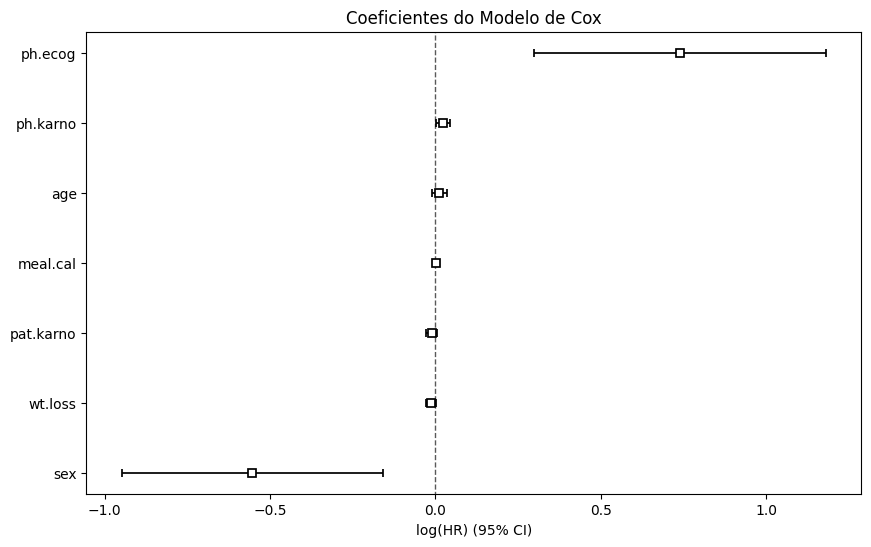

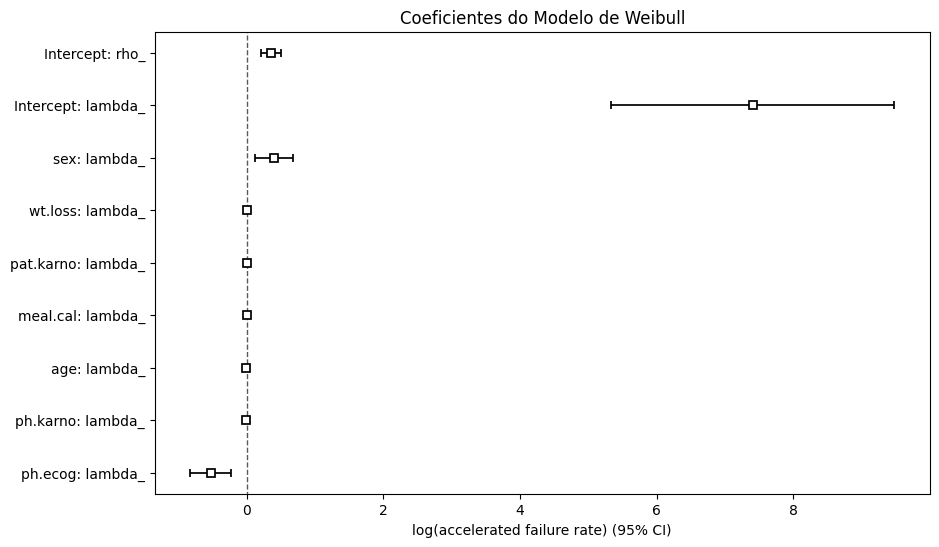

In [18]:
# Visualizar as contribuições das variáveis no Modelo de Cox
plt.figure(figsize=(10, 6))
cox_model.plot()
plt.title('Coeficientes do Modelo de Cox')
plt.show()

# Visualizar as contribuições das variáveis no Modelo de Weibull
plt.figure(figsize=(10, 6))
weibull_model.plot()
plt.title('Coeficientes do Modelo de Weibull')
plt.show()


### 5. Análise de Resíduos

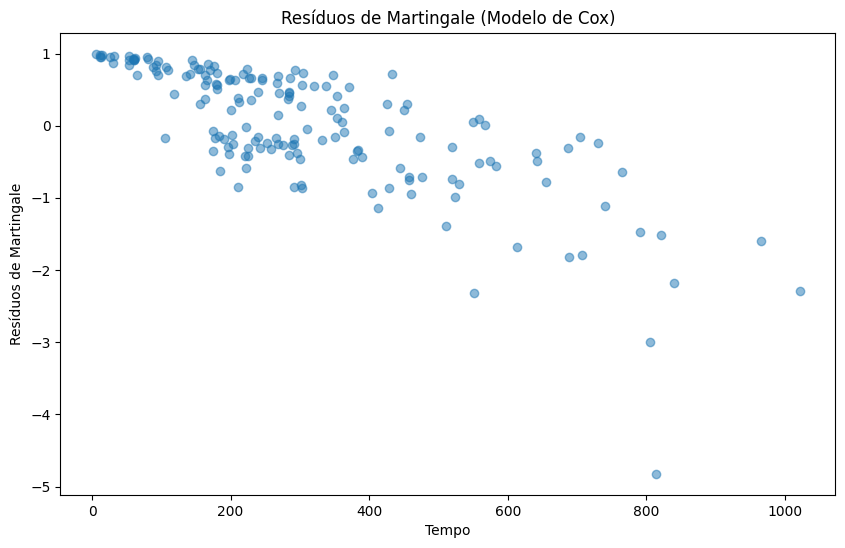

NotImplementedError: Working on it. Only available for Cox models at the moment.

In [19]:
# Resíduos do Modelo de Cox
cox_residuals = cox_model.compute_residuals(model_data, 'martingale')
plt.figure(figsize=(10, 6))
plt.scatter(cox_residuals['time'], cox_residuals['martingale'], alpha=0.5)
plt.title('Resíduos de Martingale (Modelo de Cox)')
plt.xlabel('Tempo')
plt.ylabel('Resíduos de Martingale')
plt.show()

# Resíduos do Modelo de Weibull
weibull_residuals = weibull_model.compute_residuals(model_data, 'deviance')
plt.figure(figsize=(10, 6))
plt.scatter(weibull_residuals['time'], weibull_residuals['deviance'], alpha=0.5)
plt.title('Resíduos de Deviance (Modelo de Weibull)')
plt.xlabel('Tempo')
plt.ylabel('Resíduos de Deviance')
plt.show()

### 6. Comparação de Modelos

In [ ]:
# AIC e BIC para comparação de modelos
print("\nComparação de Modelos:")
print(f"AIC (Cox): {cox_model.AIC_partial_}")
print(f"AIC (Weibull): {weibull_model.AIC_}")
print(f"BIC (Cox): {cox_model.BIC_partial_}")
print(f"BIC (Weibull): {weibull_model.BIC_}")

### 7. Conclusão

O modelo de Cox e o modelo de Weibull foram ajustados aos dados de sobrevivência. A análise dos resíduos e a comparação dos critérios AIC e BIC podem ajudar a determinar qual modelo é mais adequado para os dados.